In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import time 
from scipy import stats
from scipy.stats import skew 
from scipy.stats import norm

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings('ignore')

In [8]:
data_rfm = pd.read_csv('data/RFM_clean.csv')
data_rfm

,Recency,Frequency,Monetary
0,15,5,3113.890
1,27,3,5694.065
2,22,8,21613.800
3,12,4,6092.970
4,3,4,7597.980
...,...,...,...
5296,21,5,12574.900
5297,18,5,442.000
5298,34,2,5078.580
5299,40,2,3815.565


Plotting functions

In [2]:
def plot_2d(data,col):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    for i in range(3):
        for j in range(3):
            axs[i, j].scatter(data[col[i]],data[col[j]],c=data['Cluster'],cmap='viridis',s=5)
            axs[i, j].set_xlabel(col[i])
            axs[i, j].set_ylabel(col[j])
    fig.tight_layout()  

In [1]:
def plot_3d(data,col):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, projection='3d') 
    # plot points
    ax.scatter(data[col[0]],
                data[col[1]],
                data[col[2]], 
                c=data["Cluster"],
                cmap='viridis',
                s=5,
                alpha=1)
    ax.view_init()
    plt.xlabel(col[0])
    plt.ylabel(col[1])
    ax.set_zlabel(col[2])
    plt.show()

Normalizing Data

In [4]:
def normalize_data(data, columns):
    scaler = preprocessing.MinMaxScaler()
    d = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(d, columns=columns)
    for c in columns :
        data['Norm'+c] = scaled_df[c]

In [9]:
normalize_data(data_rfm,['Recency','Frequency','Monetary'])

Elbow Method

In [5]:
def elbow_method(data, columns):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    data_em = data[columns]
    K = range(1, 10)
 
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(data_em)
        kmeanModel.fit(data_em)
     
        distortions.append(sum(np.min(cdist(data_em, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / data_em.shape[0])
        inertias.append(kmeanModel.inertia_)
 
        mapping1[k] = sum(np.min(cdist(data_em, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / data_em.shape[0]
        mapping2[k] = kmeanModel.inertia_
        
    for key, val in mapping1.items():
        print(f'{key} : {val}')
        
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()
    
    for key, val in mapping2.items():
        print(f'{key} : {val}')
    
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

1 : 0.32652662393999815
2 : 0.25056196303315964
3 : 0.2185385019038951
4 : 0.19960186100712277
5 : 0.18607006520805144
6 : 0.17579919041492312
7 : 0.16626375081472397
8 : 0.1601418732178578
9 : 0.1534384122896226


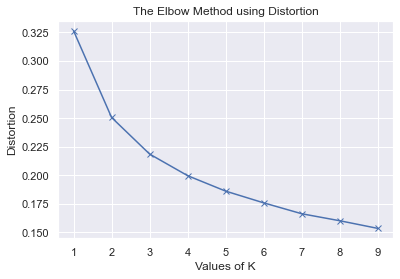

1 : 690.0014768129025
2 : 395.39701121480994
3 : 300.12703247147397
4 : 251.54282673445357
5 : 215.8344121857722
6 : 192.98740713766304
7 : 173.2446813026712
8 : 160.53910943818286
9 : 148.3387391758904


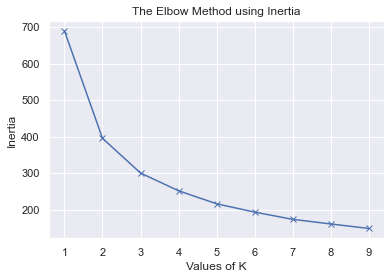

In [10]:
elbow_method(data_rfm,['NormRecency','NormFrequency','NormMonetary'])

KMeans

In [11]:
def kmeans_(data,n,col):
    #initiliaze model
    kmeans = KMeans(n_clusters=n, random_state=123, max_iter=800, n_init=30, algorithm='full')
    #fitting
    data['Cluster'] = kmeans.fit_predict(data[col])

K = 4

In [12]:
kmeans_(data_rfm, 4, ['NormRecency','NormFrequency','NormMonetary'])

In [13]:
rst = data_rfm.groupby('Cluster').agg({'Recency':['min','max','mean'],
                                'Frequency':['min','max','mean'],
                                'Monetary':['min','max','mean'],
                                'NormRecency':['min','max'],
                                'NormFrequency':['min','max'],
                                'NormMonetary':['min','max','size']})
rst

Recency                Frequency               Monetary             \
            min max       mean       min max      mean      min        max   
Cluster                                                                      
0            23  43  31.029774         1   7  2.328542    97.24  17968.405   
1             0  34  13.619329         4  10  6.870809  3407.82  26252.590   
2             0  34  15.867550         3   9  4.831678    22.10  18673.395   
3             0  23  15.109260         1   5  2.702199    97.24  13604.760   

                      NormRecency           NormFrequency            \
                 mean         min       max           min       max   
Cluster                                                               
0         4932.106237    0.534884  1.000000      0.000000  0.666667   
1        16487.676667    0.000000  0.790698      0.333333  1.000000   
2         9915.737014    0.000000  0.790698      0.222222  0.888889   
3         4857.141975    0.000000  0.534884      0.000000  0.444444   

        NormMonetary                  
                 min       max  size  
Cluster                               
0           0.002865  0.684177   974  
1           0.129076  1.000000  1014  
2           0.000000  0.711054  1812  
3           0.002865  0.517820  1501

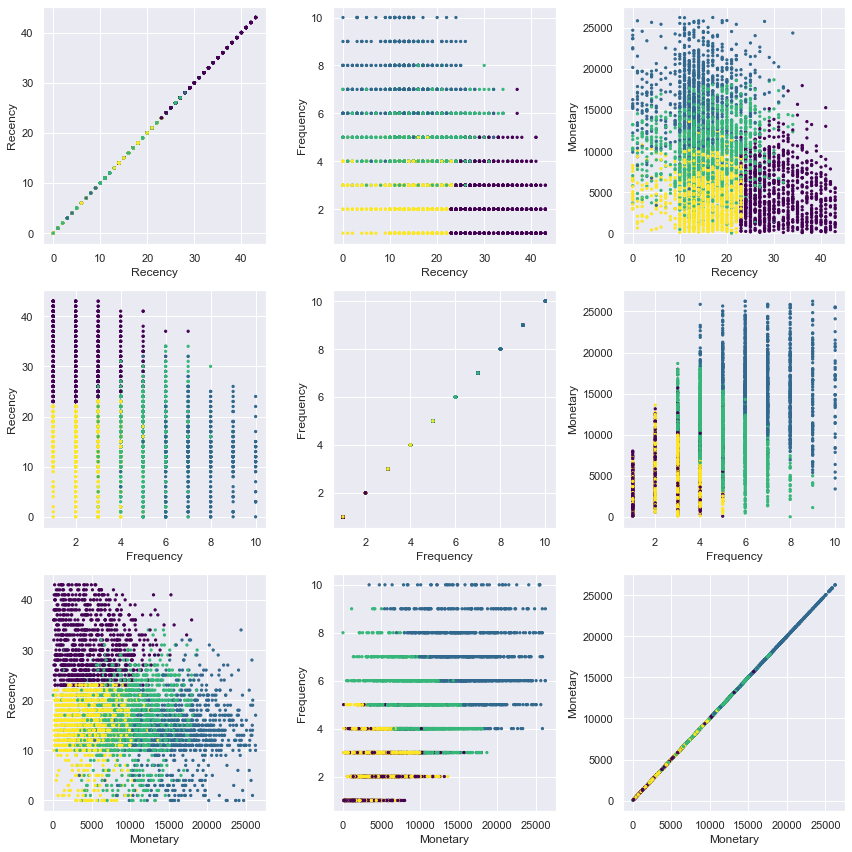

In [17]:
plot_2d(data_rfm, ['Recency','Frequency','Monetary'])

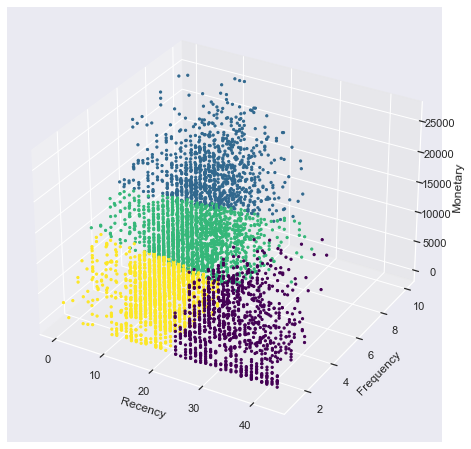

In [19]:
plot_3d(data_rfm, ['Recency','Frequency','Monetary'])

K = 3

In [21]:
kmeans_(data_rfm, 3, ['NormRecency','NormFrequency','NormMonetary'])

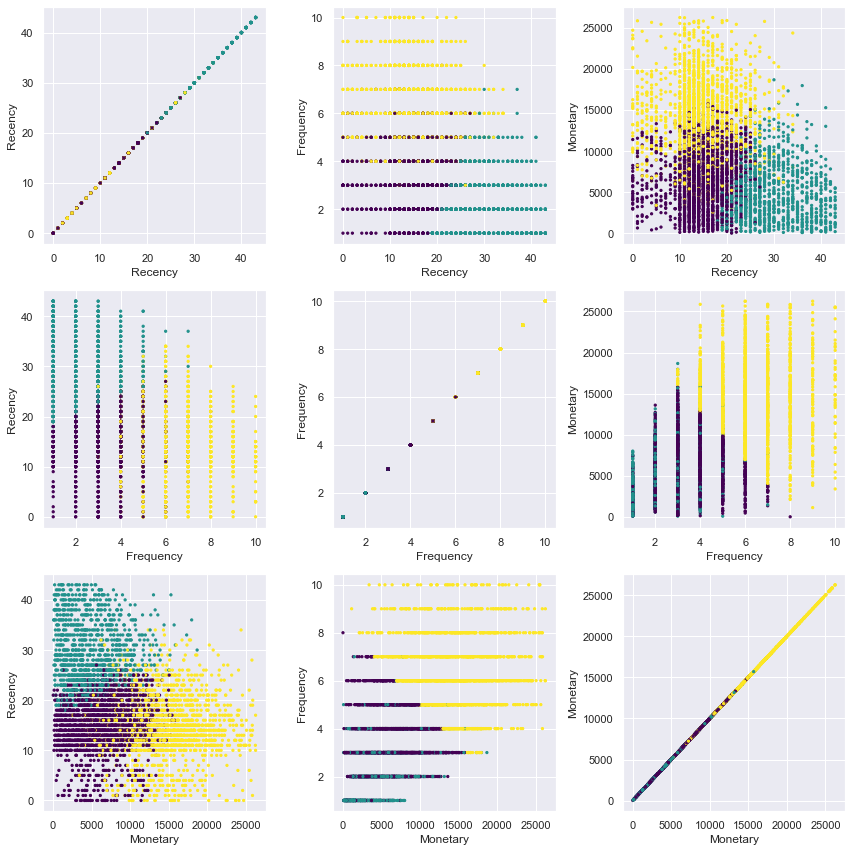

In [22]:
plot_2d(data_rfm, ['Recency','Frequency','Monetary'])

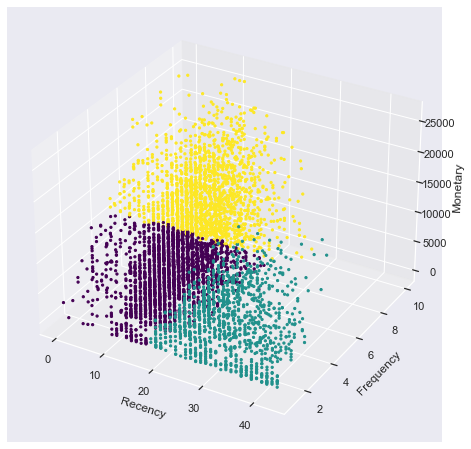

In [23]:
plot_3d(data_rfm, ['Recency','Frequency','Monetary'])